#300 dim
#200 seq length
#10 epoch
# LSTM
# Glove WE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from collections import Counter
from keras.models import model_from_json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

/home/mjokhio12/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('msproj/clean_train4.csv')
data

,Unnamed: 0,text,label
0,0,zoom piano roll zoom piano roll would useful,1
1,1,buggy behavior selection screenshot http cloud...,0
2,2,auto update feature great job far saenz ramiro...,1
3,3,filter noisy endpoint log think stop logging r...,1
4,4,enable pid pid alarm action expected behavior ...,0
...,...,...,...
449995,449995,shield invalid date make crash renderer date f...,0
449996,449996,fix knight seriously one thing week,0
449997,449997,portaudio playback binding crash often ubuntu ...,0
449998,449998,add path option allowing user specify custom d...,1


In [ ]:
class_names = ['Bug', 'Feature', 'Question']

In [ ]:
%%time
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

train_samples = []   
train_labels = []
val_samples = []
val_labels = []

for index, row in train.iterrows():
    train_samples.append(row['text'])
    train_labels.append(row['label'])
    # print(row['text'], row['target'])

for index, row in test.iterrows():
    val_samples.append(row['text'])
    val_labels.append(row['label'])
    # print(row['text'], row['target'])

CPU times: user 33.6 s, sys: 12.8 ms, total: 33.6 s
Wall time: 33.6 s


In [ ]:
print(len(train_samples))
print(len(val_labels))

360000
90000


In [ ]:
# How many unique words have this text
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [ ]:
text_values = train["text"]
counter = counter_word(text_values)
len(counter)

97196

In [ ]:
vocab_size = len(counter)
embedding_dim = 300
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
%%time
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_samples)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_samples)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(val_samples)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

CPU times: user 26.6 s, sys: 228 ms, total: 26.9 s
Wall time: 26.8 s


In [ ]:
len(tokenizer.index_word)

97197

In [ ]:
print(len(training_sequences))
print(training_padded.shape)

360000
(360000, 200)


In [ ]:
print(len(val_sequences))
print(val_padded.shape)

90000
(90000, 200)


In [ ]:
import csv

In [ ]:
# open file for writing, "w" is writing
w = csv.writer(open("msproj/Clean_data4_WI.csv", "w"))

# loop over dictionary keys and values
for key, val in dict(list(word_index.items())).items():

    # write every key and value to file
    w.writerow([key, val])

In [ ]:
print(training_sequences[10])

[11, 1656, 2124, 365, 274, 164, 5195, 1656, 66]


In [ ]:
for number in range(5):
    print(len(training_sequences[number]))
    print(len(training_padded[number]))

6
200
13
200
104
200
318
200
38
200


In [ ]:
print(training_sequences[10])

[11, 1656, 2124, 365, 274, 164, 5195, 1656, 66]


In [ ]:
print(training_padded[10])

[  11 1656 2124  365  274  164 5195 1656   66    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
print(training_sequences[0])

[41, 1056, 41, 1056, 1463, 216]


In [ ]:
print(training_padded[0])

[  41 1056   41 1056 1463  216    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
training_padded = np.array(training_padded)
train_labels = np.array(train_labels)
val_padded = np.array(val_padded)
val_labels = np.array(val_labels)

In [ ]:
print(train_labels[0])
print(train_labels[1])
print(train_labels[2])
print(train_labels.shape)

print(val_labels[0])
print(val_labels[1])
print(val_labels[2])
print(val_labels.shape)

1
1
0
(360000,)
0
0
1
(90000,)


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_text(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_text(training_padded[10]))
print('---')
print(train_samples[10])

add applicable tax section provide date satisfied applicable option ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
add applicable tax section provide date satisfied applicable option


In [ ]:
def load_glove_format(filename: str, embedding_dim: int):
    word_vectors = {}
    with open(filename, 'r') as reader:
        for i, line in enumerate(reader):
            line = line.strip().split()
            word = line[0]
            word_vector = np.array([v for v in line[1:]])

            if word_vector.shape[0] == embedding_dim:
              word_vectors[word] = word_vector

    return word_vectors

In [ ]:
dictemb=load_glove_format("msproj/embeddings/glove.840B.300d.txt", 300)

In [ ]:
dict_items = dictemb.items()
first_two = list(dict_items)[:2]
# print(first_two)

Now, let's prepare a corresponding embedding matrix that we can use in a Keras
`Embedding` layer. It's a simple NumPy matrix where entry at index `i` is the pre-trained
vector for the word of index `i` in our `vectorizer`'s vocabulary.

In [ ]:
num_tokens = vocab_size + 2
embedding_dim = 300
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
# print(embedding_matrix.shape)
for word, i in word_index.items():
    embedding_vector = dictemb.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        # print(embedding_vector.shape)
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
p = (hits*100)/vocab_size
print("Percentage of vocabulary matched: ", p)

Converted 78850 words (18347 misses)
Percentage of vocabulary matched:  81.12473764352443


Next, we load the pre-trained word embeddings matrix into an `Embedding` layer.

Note that we set `trainable=False` so as to keep the embeddings fixed (we don't want to
update them during training).

In [ ]:
%%time
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding( num_tokens, embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix), trainable=False )

CPU times: user 17.4 ms, sys: 112 µs, total: 17.5 ms
Wall time: 136 ms


## Build the model



In [ ]:
from tensorflow.keras import layers
# Input for variable-length sequences of integers
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
# Embed each integer in a 200-dimensional vector
embedded_sequences = embedding_layer(int_sequences_input)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(embedded_sequences)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
preds = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 300)         29159400  
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         186880    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 29,445,483
Trainable params: 286,083
Non-trainable params: 29,159,400
_________________________________________________________________


## Train the model

First, convert our list-of-strings data to NumPy arrays of integer indices. The arrays
are right-padded.

We use categorical crossentropy as our loss since we're doing softmax classification.
Moreover, we use `sparse_categorical_crossentropy` since our labels are integers.

In [ ]:
%%time
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
history =  model.fit(training_padded, train_labels, batch_size=128, epochs=10, validation_data=(val_padded, val_labels))

Epoch 1/10
2813/2813 [==============================] - 1431s 504ms/step - loss: 0.6089 - acc: 0.7590 - val_loss: 0.5771 - val_acc: 0.7783
Epoch 2/10
2813/2813 [==============================] - 1409s 501ms/step - loss: 0.5461 - acc: 0.7883 - val_loss: 0.5500 - val_acc: 0.7868
Epoch 3/10
2813/2813 [==============================] - 1412s 502ms/step - loss: 0.5197 - acc: 0.7993 - val_loss: 0.5457 - val_acc: 0.7887
Epoch 4/10
2813/2813 [==============================] - 1407s 500ms/step - loss: 0.4975 - acc: 0.8086 - val_loss: 0.5424 - val_acc: 0.7905
Epoch 5/10
2813/2813 [==============================] - 1406s 500ms/step - loss: 0.4764 - acc: 0.8176 - val_loss: 0.5507 - val_acc: 0.7890
Epoch 6/10
2813/2813 [==============================] - 1403s 499ms/step - loss: 0.4553 - acc: 0.8267 - val_loss: 0.5614 - val_acc: 0.7882
Epoch 7/10
2813/2813 [==============================] - 1405s 500ms/step - loss: 0.4334 - acc: 0.8356 - val_loss: 0.5798 - val_acc: 0.7837
Epoch 8/10
2813/2813 [=====

In [ ]:
# evaluate model
yhat = model.predict(val_padded)
score = roc_auc_score(val_labels, yhat,multi_class='ovr')
print('ROC AUC: %.3f' % score)

ROC AUC: 0.867


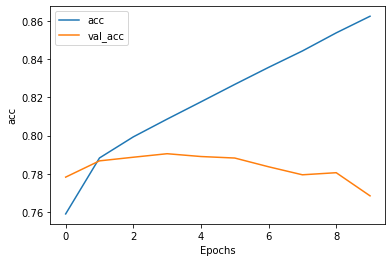

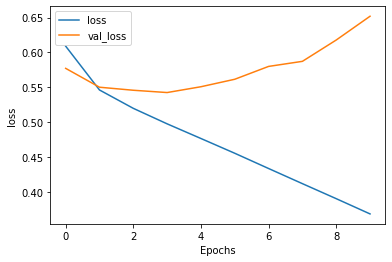

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[2]))
print(train_samples[2])
print(train_labels[2])

inbox sum unread problem count equal unread count language happened time able figure exactly circumstance occurs case seems happening ruby track example unread item hamming unread item anagram one would think mean unread item total ruby counter say click hamming item one one hamming ruby counter decrease also click two anagram item decrease counter well left one anagram item unread zero ruby item unread expect ruby counter instead right screenshot current inbox stand http img may unread count ruby track synced going read submission leave last one submission unread help diagnose issue way see difference square submission see difference square since submitted solution problem ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
inbox sum unread problem count equal unread count language happened time able figure exactly circumstance occurs case seems h

In [ ]:
def Convert(stng):
  li = []
  li.append(stng)
  return li

In [ ]:
txt = "unable mine rock sark starting today hit enter."

def pred_it(txt):
  seq = tokenizer.texts_to_sequences(txt)
  padded = pad_sequences(seq, maxlen=max_length,padding=padding_type, truncating=trunc_type)
  pred = model.predict(padded)
  labels = [0, 1, 2]
  return labels[np.argmax(pred)]  

In [ ]:
print(Convert(txt))
pred_it(Convert(txt))

['unable mine rock sark starting today hit enter.']


0

## Export an end-to-end model

Now, we may want to export a `Model` object that takes as input a string of arbitrary
length, rather than a sequence of indices. It would make the model much more portable,
since you wouldn't have to worry about the input preprocessing pipeline.

Our `vectorizer` is actually a Keras layer, so it's simple:

In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("msproj/Classify_GloVe_WordEmb_BiLSTMv2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("msproj/Classify_GloVe_WordEmb_BiLSTMv2.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
tf.keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
dataset_test = pd.read_csv('msproj/clean_test4.csv')
dataset_test['pred'] = 3
dataset_test

,Unnamed: 0,text,label,pred
0,0,config question path specific environment vari...,0,3
1,1,crash indien vol simulator crash hij vol,0,3
2,2,unable mine rock sark starting today hit enter...,0,3
3,3,whitelists processed create following rule ord...,0,3
4,4,add ctx menu ida free ida free associated dll ...,0,3
...,...,...,...,...
29995,29995,closing project running simulation stop simula...,0,3
29996,29996,missing table description iseries driver table...,0,3
29997,29997,case notification shown new message always cha...,0,3
29998,29998,error syncing see following error log error ja...,0,3


In [ ]:
dst = dataset_test['text'].head(4)
dst

0    config question path specific environment vari...
1             crash indien vol simulator crash hij vol
2    unable mine rock sark starting today hit enter...
3    whitelists processed create following rule ord...
Name: text, dtype: object

In [ ]:
%%time
for item in dst:
  print(pred_it(Convert(item)))

2
0
0
0
CPU times: user 481 ms, sys: 94.2 ms, total: 575 ms
Wall time: 205 ms


In [ ]:
dataset_test['pred']=dataset_test['text'].apply(lambda x: pred_it(Convert(x)))

In [ ]:
dataset_test['pred'].value_counts()

1    15117
0    12682
2     2201
Name: pred, dtype: int64

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(dataset_test['label'], dataset_test['pred'] ))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59     30000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.42     30000
   macro avg       0.33      0.14      0.20     30000
weighted avg       1.00      0.42      0.59     30000



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dataset_test['label'], dataset_test['pred'])

array([[12682, 15117,  2201],
       [    0,     0,     0],
       [    0,     0,     0]])

In [ ]:
!sudo apt install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.38.0-12ubuntu2.1).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.


In [ ]:
!pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
